**This notebook serves the purpose of visualizing of descriptive statistics and clustering results.**

**Resources consulted online**:
1. https://github.com/UChicago-CCA-2021/lucem_illud
2. https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval
3. https://stackoverflow.com/questions/4530611/saving-and-loading-objects-and-using-pickle

# Load Modules

In [1]:
import pandas as pd
import numpy as np
import lucem_illud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import html
import re
import pickle
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Prepare the Data

In [2]:
# Read the dataframe containing all detailed funding information
funding_info = pd.read_csv("../database/funding_info.csv")
funding_info.drop(columns=['Unnamed: 0'], inplace=True)
funding_info.head()

first_name middle_name  last_name                    email  \
0       Jean         NaN   Comaroff     jcomaro@uchicago.edu   
1      Talal         NaN       Asad  talalasad@earthlink.net   
2       John         NaN     Cherry    John_Cherry@brown.edu   
3       Leaf         NaN  Van Boven    vanboven@colorado.edu   
4     Steven         NaN    Bedrick        bedricks@ohsu.edu   

                              institution  \
0                   University of Chicago   
1  CUNY Graduate School University Center   
2                        Brown University   
3       University of Colorado at Boulder   
4      Oregon Health & Science University   

                                directorate  \
0  Direct For Social, Behav & Economic Scie   
1  Direct For Social, Behav & Economic Scie   
2  Direct For Social, Behav & Economic Scie   
3  Direct For Social, Behav & Economic Scie   
4  Direct For Social, Behav & Economic Scie   

                                   division effective_date expiration_date  \
0  Division Of Behavioral and Cognitive Sci     02/01/2011      01/31/2013   
1  Division Of Behavioral and Cognitive Sci     01/01/2011      09/30/2012   
2  Division Of Behavioral and Cognitive Sci     01/01/2011      06/30/2012   
3  Division Of Behavioral and Cognitive Sci     04/01/2011      03/31/2015   
4  Division Of Behavioral and Cognitive Sci     04/01/2011      09/30/2013   

   award_amount                                        award_title  \
0         20000  Doctoral Dissertation Research: The Role of Kn...   
1         19901  Doctoral Dissertation Research: Mental Disorde...   
2         14820  Doctoral Dissertation Improvement Grant: Rethi...   
3        250000          EAGER: Perceiving Political Distributions   
4        114140  Corpora of Non-Linguistic Symbol Systems, and ...   

                                            abstract  award_year  
0  University of Chicago doctoral student Brenden...        2011  
1  Doctoral student Ana Maria Vinea (Graduate Cen...        2011  
2  In collaboration with the Central Lydia Archae...        2011  
3  The present research focuses on motivated poli...        2011  
4  Throughout the millenia, humans have used grap...        2011

In [3]:
# Read the dataframe containing all funding, author and publication information for each awarded author
combined_info = pd.read_csv("../database/preprocessed_content_analysis.csv", index_col=0)
combined_info.head()

first_name middle_name  last_name                    email  \
0      Talal         NaN       Asad  talalasad@earthlink.net   
1      Talal         NaN       Asad  talalasad@earthlink.net   
2      Talal         NaN       Asad  talalasad@earthlink.net   
3      Talal         NaN       Asad  talalasad@earthlink.net   
4       Leaf         NaN  Van Boven    vanboven@colorado.edu   

                              institution  award_year  award_amount  \
0  cuny graduate school university center        2011         19901   
1  cuny graduate school university center        2011         19901   
2  cuny graduate school university center        2011         19901   
3  cuny graduate school university center        2011         19901   
4       university of colorado at boulder        2011        250000   

                                         paper_title  \
0  Effect of oxidation and geometrical dimensions...   
1  Synthesis and biological evaluation of new pyr...   
2  Synthesis of 6-Ethyl-1, 2, 9-trioxopyrrolo [3,...   
3  Randa M. Al-As’ ada, Mustafa M. El-abadelaha, ...   
4  Identifiable but not identical: Combining soci...   

                            journal  publication_year  ... citation_2019  \
0                      Desalination              2011  ...            13   
1                         Molecules              2014  ...            13   
2  Zeitschrift für Naturforschung B              2013  ...            13   
3                    Z. Naturforsch              2013  ...            13   
4      Journal of Consumer research              2012  ...           868   

  citation_2020  citation_2021  citation_2022  citation_2023  citation_2024  \
0             5             10              5              7              1   
1             5             10              5              7              1   
2             5             10              5              7              1   
3             5             10              5              7              1   
4          1234           1132           1198           1222            179   

                                     tokenized_title  \
0  ['Effect', 'of', 'oxidation', 'and', 'geometri...   
1  ['Synthesis', 'and', 'biological', 'evaluation...   
2  ['Synthesis', 'of', '6', 'Ethyl-1', '2', '9', ...   
3  ['Randa', 'M.', 'Al', 'As', 'ada', 'Mustafa', ...   
4  ['Identifiable', 'but', 'not', 'identical', 'C...   

                                    normalized_title  \
0  ['effect', 'oxidation', 'geometrical', 'dimens...   
1  ['synthesis', 'biological', 'evaluation', 'new...   
2  ['synthesis', 'ethyl-1', 'trioxopyrrolo', 'f',...   
3  ['randa', 'm.', 'al', 'ada', 'mustafa', 'm.', ...   
4  ['identifiable', 'identical', 'combine', 'soci...   

                                  tokenized_abstract  \
0  ['This', 'study', 'reports', 'for', 'the', 'fi...   
1  ['A', 'selected', 'set', 'of', 'substituted', ...   
2  ['Interaction', 'of', '6', 'amino-1', 'ethyl-4...   
3  ['Interaction', 'of', '6', 'amino-1', 'ethyl-4...   
4  ['How', 'do', 'consumers', 'reconcile', 'confl...   

                                 normalized_abstract  
0  ['study', 'report', 'time', 'use', 'oxidize', ...  
1  ['select', 'set', 'substituted', 'pyridone', '...  
2  ['interaction', 'amino-1', 'ethyl-4', 'oxoquin...  
3  ['interaction', 'amino-1', 'ethyl-4', 'oxoquin...  
4  ['consumer', 'reconcile', 'conflicting', 'moti...  

[5 rows x 41 columns]

In [9]:
combined_info.columns

Index(['first_name', 'middle_name', 'last_name', 'email', 'institution',
       'award_year', 'award_amount', 'paper_title', 'journal',
       'publication_year', 'coauthors', 'paper_abstract',
       'paper_total_citations', 'citation_2001', 'citation_2002',
       'citation_2003', 'citation_2004', 'citation_2005', 'citation_2006',
       'citation_2007', 'citation_2008', 'citation_2009', 'citation_2010',
       'citation_2011', 'citation_2012', 'citation_2013', 'citation_2014',
       'citation_2015', 'citation_2016', 'citation_2017', 'citation_2018',
       'citation_2019', 'citation_2020', 'citation_2021', 'citation_2022',
       'citation_2023', 'citation_2024', 'tokenized_title', 'normalized_title',
       'tokenized_abstract', 'normalized_abstract'],
      dtype='object')

In [4]:
# Read the author_info data
author_df = pd.read_csv('../database/author_info.csv', index_col=0)
author_df['interests'] = author_df['interests'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
author_df.head()

first_name middle_name  last_name                    email  \
0      Talal         NaN       Asad  talalasad@earthlink.net   
1       Leaf         NaN  Van Boven    vanboven@colorado.edu   
2     Steven         NaN    Bedrick        bedricks@ohsu.edu   
3     George           R     Milner              ost@psu.edu   
4     Shelly         NaN      Gable     gable@psych.ucsb.edu   

                               institution  \
0   CUNY Graduate School University Center   
1        University of Colorado at Boulder   
2       Oregon Health & Science University   
3  Pennsylvania State Univ University Park   
4   University of California-Santa Barbara   

                                                 url  total_citations  \
0  https://scholar.google.com/citations?hl=en&use...              106   
1  https://scholar.google.com/citations?hl=en&use...            12916   
2  https://scholar.google.com/citations?hl=en&use...             2230   
3  https://scholar.google.com/citations?hl=en&use...             9549   
4  https://scholar.google.com/citations?hl=en&use...            30300   

   h_index                                          interests  citation_2011  \
0        3                                [organic chemistry]            2.0   
1       46  [Social psychology, judgment and decision maki...          363.0   
2       21                         [NLP, Medical Informatics]           63.0   
3       42  [Archaeology (eastern North America, Warfare, ...          295.0   
4       54                                                NaN         1119.0   

   ...  citation_2004  citation_2005  citation_2006  citation_2007  \
0  ...            NaN            NaN            NaN            NaN   
1  ...           74.0          127.0          157.0          193.0   
2  ...            NaN            6.0           10.0            5.0   
3  ...          151.0          184.0          203.0          247.0   
4  ...          230.0          313.0          533.0          555.0   

   citation_2008  citation_2009  citation_2010  citation_2001  citation_2002  \
0            NaN            NaN            NaN            NaN            NaN   
1          244.0          273.0          327.0            NaN            NaN   
2           12.0           37.0           60.0            NaN            NaN   
3          242.0          228.0          254.0          131.0          180.0   
4          794.0          798.0         1039.0            NaN          115.0   

   award_year  
0        2011  
1        2011  
2        2011  
3        2011  
4        2011  

[5 rows x 34 columns]

In [11]:
author_df.columns

Index(['first_name', 'middle_name', 'last_name', 'email', 'institution', 'url',
       'total_citations', 'h_index', 'interests', 'citation_2011',
       'citation_2012', 'citation_2013', 'citation_2014', 'citation_2015',
       'citation_2016', 'citation_2017', 'citation_2018', 'citation_2019',
       'citation_2020', 'citation_2021', 'citation_2022', 'citation_2023',
       'citation_2024', 'citation_2003', 'citation_2004', 'citation_2005',
       'citation_2006', 'citation_2007', 'citation_2008', 'citation_2009',
       'citation_2010', 'citation_2001', 'citation_2002', 'award_year'],
      dtype='object')

In [6]:
# Read the regression data
regression_data = pd.read_csv("../regression/regression_data.csv", index_col=0)
regression_data.head()

email  year            institution  \
0  00t0holtgrav@bsu.edu  2011  Ball State University   
1  00t0holtgrav@bsu.edu  2012  Ball State University   
2  00t0holtgrav@bsu.edu  2013  Ball State University   
3  00t0holtgrav@bsu.edu  2014  Ball State University   
4  00t0holtgrav@bsu.edu  2015  Ball State University   

                            interests  award_year  expiration_year  \
0  ['Social Psychology and Language']        2012             2017   
1  ['Social Psychology and Language']        2012             2017   
2  ['Social Psychology and Language']        2012             2017   
3  ['Social Psychology and Language']        2012             2017   
4  ['Social Psychology and Language']        2012             2017   

   award_amount                                        award_title  \
0             0  The Role of Interpersonal Processes in the Int...   
1        165000  The Role of Interpersonal Processes in the Int...   
2        165000  The Role of Interpersonal Processes in the Int...   
3        165000  The Role of Interpersonal Processes in the Int...   
4        165000  The Role of Interpersonal Processes in the Int...   

   total_citations  h_index  citation  pub_num   top_cited  
0            10066       46     367.0        2  135.000000  
1            10066       46     409.0        4   14.666667  
2            10066       46     534.0        7  281.666667  
3            10066       46     550.0        8   32.333333  
4            10066       46     496.0        3   14.000000

In [16]:
regression_data.columns

Index(['email', 'year', 'institution', 'interests', 'award_year',
       'expiration_year', 'award_amount', 'award_title', 'total_citations',
       'h_index', 'citation', 'pub_num', 'top_cited'],
      dtype='object')

In [5]:
# Read the dataframe containing clustering of authors based on paper abstract
cluster_df = pd.read_csv('../database/author_clustering/cluster_df.csv', index_col=0)
cluster_df.head()

normalized_abstract  \
email                                                                           
00t0holtgrav@bsu.edu        interdisciplinary synthesis social psychologic...   
a.satpute@northeastern.edu  emotion assume manifest subcortical limbic bra...   
aabrewer@uci.edu            functional organization human auditory cortex ...   
aag6@psu.edu                decade introduction concept emotional labor re...   
aam72@georgetown.edu        autism spectrum disorder asds characterize soc...   

                                     tfidf_cluster  
email                                               
00t0holtgrav@bsu.edu                   Linguistics  
a.satpute@northeastern.edu  Cognitive Neuroscience  
aabrewer@uci.edu            Cognitive Neuroscience  
aag6@psu.edu                            Psychology  
aam72@georgetown.edu                    Psychology

In [46]:
cluster_df.columns

Index(['email', 'normalized_abstract', 'tfidf_cluster'], dtype='object')

# Visualize Word Cloud of Research Interests

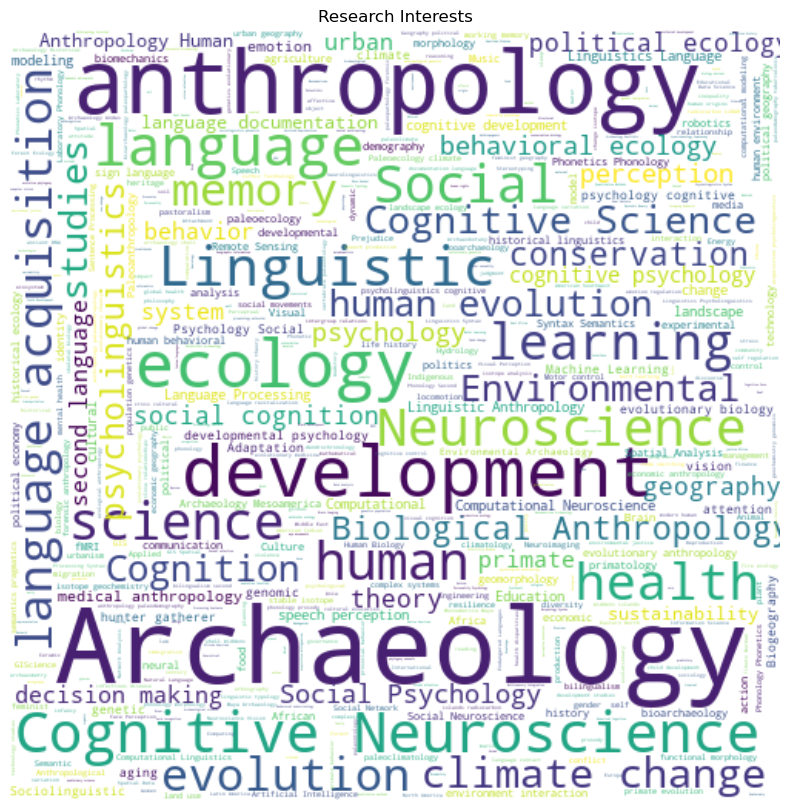

In [20]:
# create a Wordcloud object
text = ' '.join([' '.join(interest) for interest in author_df['interests'].dropna()])
wc = WordCloud(background_color="white", max_words=500, width=1000, height=1000, mode='RGBA', scale=.5, random_state=42).generate(text)

# display the generated word cloud:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title(f'Research Interests')
plt.show()

# Funding Overview

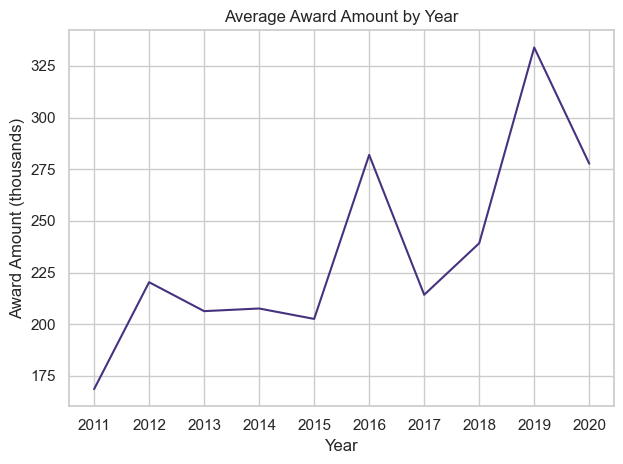

In [21]:
# First, plot a line chart showing average NSF funding amount per year
avg_funding_by_year = pd.DataFrame(np.round(combined_info.groupby(by=['award_year'])['award_amount'].mean() / 1000, 2))

sns.set_theme(style="whitegrid", palette="viridis")
sns.lineplot(data=avg_funding_by_year, x='award_year', y='award_amount')
plt.xticks(ticks=np.unique(combined_info['award_year']), labels=np.unique(combined_info['award_year']))
plt.title('Average Award Amount by Year')
plt.xlabel('Year')
plt.ylabel('Award Amount (thousands)')
plt.tight_layout()

#  Author Research Impact

# Research Trends and Interests

In [22]:
# There are rows where absract are not string (but instead float)
# Upon checking, they are NaN.
funding_info[funding_info['abstract'].apply(lambda x: not isinstance(x, str))]

first_name middle_name  last_name                         email  \
1854     Joshua         NaN     Fisher  Joshua.B.Fisher@jpl.nasa.gov   
3991       Marc           M  Sebrechts             sebrechts@cua.edu   
4570      Peter           M    Vishton                vishton@wm.edu   
4579      Tyler         NaN    Kendall               tsk@uoregon.edu   
4602    Siobhan         NaN   Mattison    siobhan.mattison@gmail.com   
4942     Trisha         NaN  Van Zandt           van-zandt.2@osu.edu   

                                        institution  \
1854  National Aeronautics and Space Administration   
3991                 Catholic University of America   
4570                    College of William and Mary   
4579                    University of Oregon Eugene   
4602                       University of New Mexico   
4942                          Ohio State University   

                                   directorate  \
1854  Direct For Social, Behav & Economic Scie   
3991  Direct For Social, Behav & Economic Scie   
4570  Direct For Social, Behav & Economic Scie   
4579  Direct For Social, Behav & Economic Scie   
4602  Direct For Social, Behav & Economic Scie   
4942  Direct For Social, Behav & Economic Scie   

                                      division effective_date expiration_date  \
1854  Division Of Behavioral and Cognitive Sci     09/01/2014      02/28/2018   
3991  Division Of Behavioral and Cognitive Sci     08/01/2018      08/19/2022   
4570  Division Of Behavioral and Cognitive Sci     09/03/2019      09/02/2022   
4579  Division Of Behavioral and Cognitive Sci     08/18/2019      08/18/2022   
4602  Division Of Behavioral and Cognitive Sci     09/03/2019      09/02/2023   
4942  Division Of Behavioral and Cognitive Sci     07/06/2020      07/05/2022   

      award_amount                                        award_title  \
1854         99114  Collaborative Research: Links Between Long-Ter...   
3991        212550                                      IPA Agreement   
4570        136965                                          IPA Award   
4579        150470                                      New IPA Award   
4602        124135                   New IPA Award - Siobhan Mattison   
4942        187691             IPA agreement for Dr. Trisha Van Zandt   

     abstract  award_year  
1854      NaN        2014  
3991      NaN        2018  
4570      NaN        2019  
4579      NaN        2019  
4602      NaN        2019  
4942      NaN        2020

In [23]:
# Drop rows where abstract is NaN
funding_info = funding_info[funding_info['abstract'].notna()]

In [15]:
# Word cloud for funding abstract over the years
funding_info['tokenized_abstract'] = funding_info['abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
funding_info['normalized_abstract'] = funding_info['tokenized_abstract'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])
funding_info.head()

/Users/samcong/anaconda3/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


first_name middle_name  last_name                    email  \
0       Jean         NaN   Comaroff     jcomaro@uchicago.edu   
1      Talal         NaN       Asad  talalasad@earthlink.net   
2       John         NaN     Cherry    John_Cherry@brown.edu   
3       Leaf         NaN  Van Boven    vanboven@colorado.edu   
4     Steven         NaN    Bedrick        bedricks@ohsu.edu   

                              institution  \
0                   University of Chicago   
1  CUNY Graduate School University Center   
2                        Brown University   
3       University of Colorado at Boulder   
4      Oregon Health & Science University   

                                directorate  \
0  Direct For Social, Behav & Economic Scie   
1  Direct For Social, Behav & Economic Scie   
2  Direct For Social, Behav & Economic Scie   
3  Direct For Social, Behav & Economic Scie   
4  Direct For Social, Behav & Economic Scie   

                                   division effective_date expiration_date  \
0  Division Of Behavioral and Cognitive Sci     02/01/2011      01/31/2013   
1  Division Of Behavioral and Cognitive Sci     01/01/2011      09/30/2012   
2  Division Of Behavioral and Cognitive Sci     01/01/2011      06/30/2012   
3  Division Of Behavioral and Cognitive Sci     04/01/2011      03/31/2015   
4  Division Of Behavioral and Cognitive Sci     04/01/2011      09/30/2013   

   award_amount                                        award_title  \
0         20000  Doctoral Dissertation Research: The Role of Kn...   
1         19901  Doctoral Dissertation Research: Mental Disorde...   
2         14820  Doctoral Dissertation Improvement Grant: Rethi...   
3        250000          EAGER: Perceiving Political Distributions   
4        114140  Corpora of Non-Linguistic Symbol Systems, and ...   

                                            abstract  award_year  \
0  University of Chicago doctoral student Brenden...        2011   
1  Doctoral student Ana Maria Vinea (Graduate Cen...        2011   
2  In collaboration with the Central Lydia Archae...        2011   
3  The present research focuses on motivated poli...        2011   
4  Throughout the millenia, humans have used grap...        2011   

                                  tokenized_abstract  \
0  [[University, of, Chicago, doctoral, student, ...   
1  [[Doctoral, student, Ana, Maria, Vinea, Gradua...   
2  [[In, collaboration, with, the, Central, Lydia...   
3  [[The, present, research, focuses, on, motivat...   
4  [[Throughout, the, millenia, humans, have, use...   

                                 normalized_abstract  
0  [[university, chicago, doctoral, student, bren...  
1  [[doctoral, student, ana, maria, vinea, gradua...  
2  [[collaboration, central, lydia, archaeologica...  
3  [[present, research, focuses, motivated, polit...  
4  [[millenia, humans, graphical, symbols], [year...

In [16]:
funding_info['wordcloud_text'] = funding_info['normalized_abstract'].apply(lambda x: [item for sublist in x for item in sublist])
funding_info.head()

first_name middle_name  last_name                    email  \
0       Jean         NaN   Comaroff     jcomaro@uchicago.edu   
1      Talal         NaN       Asad  talalasad@earthlink.net   
2       John         NaN     Cherry    John_Cherry@brown.edu   
3       Leaf         NaN  Van Boven    vanboven@colorado.edu   
4     Steven         NaN    Bedrick        bedricks@ohsu.edu   

                              institution  \
0                   University of Chicago   
1  CUNY Graduate School University Center   
2                        Brown University   
3       University of Colorado at Boulder   
4      Oregon Health & Science University   

                                directorate  \
0  Direct For Social, Behav & Economic Scie   
1  Direct For Social, Behav & Economic Scie   
2  Direct For Social, Behav & Economic Scie   
3  Direct For Social, Behav & Economic Scie   
4  Direct For Social, Behav & Economic Scie   

                                   division effective_date expiration_date  \
0  Division Of Behavioral and Cognitive Sci     02/01/2011      01/31/2013   
1  Division Of Behavioral and Cognitive Sci     01/01/2011      09/30/2012   
2  Division Of Behavioral and Cognitive Sci     01/01/2011      06/30/2012   
3  Division Of Behavioral and Cognitive Sci     04/01/2011      03/31/2015   
4  Division Of Behavioral and Cognitive Sci     04/01/2011      09/30/2013   

   award_amount                                        award_title  \
0         20000  Doctoral Dissertation Research: The Role of Kn...   
1         19901  Doctoral Dissertation Research: Mental Disorde...   
2         14820  Doctoral Dissertation Improvement Grant: Rethi...   
3        250000          EAGER: Perceiving Political Distributions   
4        114140  Corpora of Non-Linguistic Symbol Systems, and ...   

                                            abstract  award_year  \
0  University of Chicago doctoral student Brenden...        2011   
1  Doctoral student Ana Maria Vinea (Graduate Cen...        2011   
2  In collaboration with the Central Lydia Archae...        2011   
3  The present research focuses on motivated poli...        2011   
4  Throughout the millenia, humans have used grap...        2011   

                                  tokenized_abstract  \
0  [[University, of, Chicago, doctoral, student, ...   
1  [[Doctoral, student, Ana, Maria, Vinea, Gradua...   
2  [[In, collaboration, with, the, Central, Lydia...   
3  [[The, present, research, focuses, on, motivat...   
4  [[Throughout, the, millenia, humans, have, use...   

                                 normalized_abstract  \
0  [[university, chicago, doctoral, student, bren...   
1  [[doctoral, student, ana, maria, vinea, gradua...   
2  [[collaboration, central, lydia, archaeologica...   
3  [[present, research, focuses, motivated, polit...   
4  [[millenia, humans, graphical, symbols], [year...   

                                      wordcloud_text  
0  [university, chicago, doctoral, student, brend...  
1  [doctoral, student, ana, maria, vinea, graduat...  
2  [collaboration, central, lydia, archaeological...  
3  [present, research, focuses, motivated, politi...  
4  [millenia, humans, graphical, symbols, years, ...

In [17]:
# Define a function to remove html components in the string
def remove_html(content_list):
    # Convert HTML entities to their corresponding characters
    cleaned_content_list = []

    for i in content_list:
        decoded_content = html.unescape(i)
    
        # Remove HTML tags
        clean_content = re.sub(r'<[^>]*>', '', decoded_content)

        cleaned_content_list.append(clean_content)

    
    return cleaned_content_list

In [18]:
funding_info['wordcloud_text_cleaned'] = funding_info['wordcloud_text'].apply(remove_html)

In [19]:
# Group the normalized abstract tokens by award year
funding_info_aggregated_words = funding_info.groupby('award_year')['wordcloud_text_cleaned'].agg(lambda x: sum(x, [])).reset_index()
funding_info_aggregated_words['wordcloud_text_cleaned'] = funding_info_aggregated_words['wordcloud_text_cleaned'].apply(lambda x: ' '.join(x))
funding_info_aggregated_words

award_year                             wordcloud_text_cleaned
0        2011  university chicago doctoral student brenden ra...
1        2012  primary goal project extend current signtyp da...
2        2013  funding national science foundation dr glenn s...
3        2014  wars afghanistan iraq characterized exceptiona...
4        2015  sarah hlubik rutgers state university new jers...
5        2016  essential elements constitute minimal scientif...
6        2017  past decades cutting edge social personality p...
7        2018  award nsf eager funding mechanism supports ear...
8        2019  project combine genomic historical archaeologi...
9        2020  financial activities ubiquitous worldwide glob...

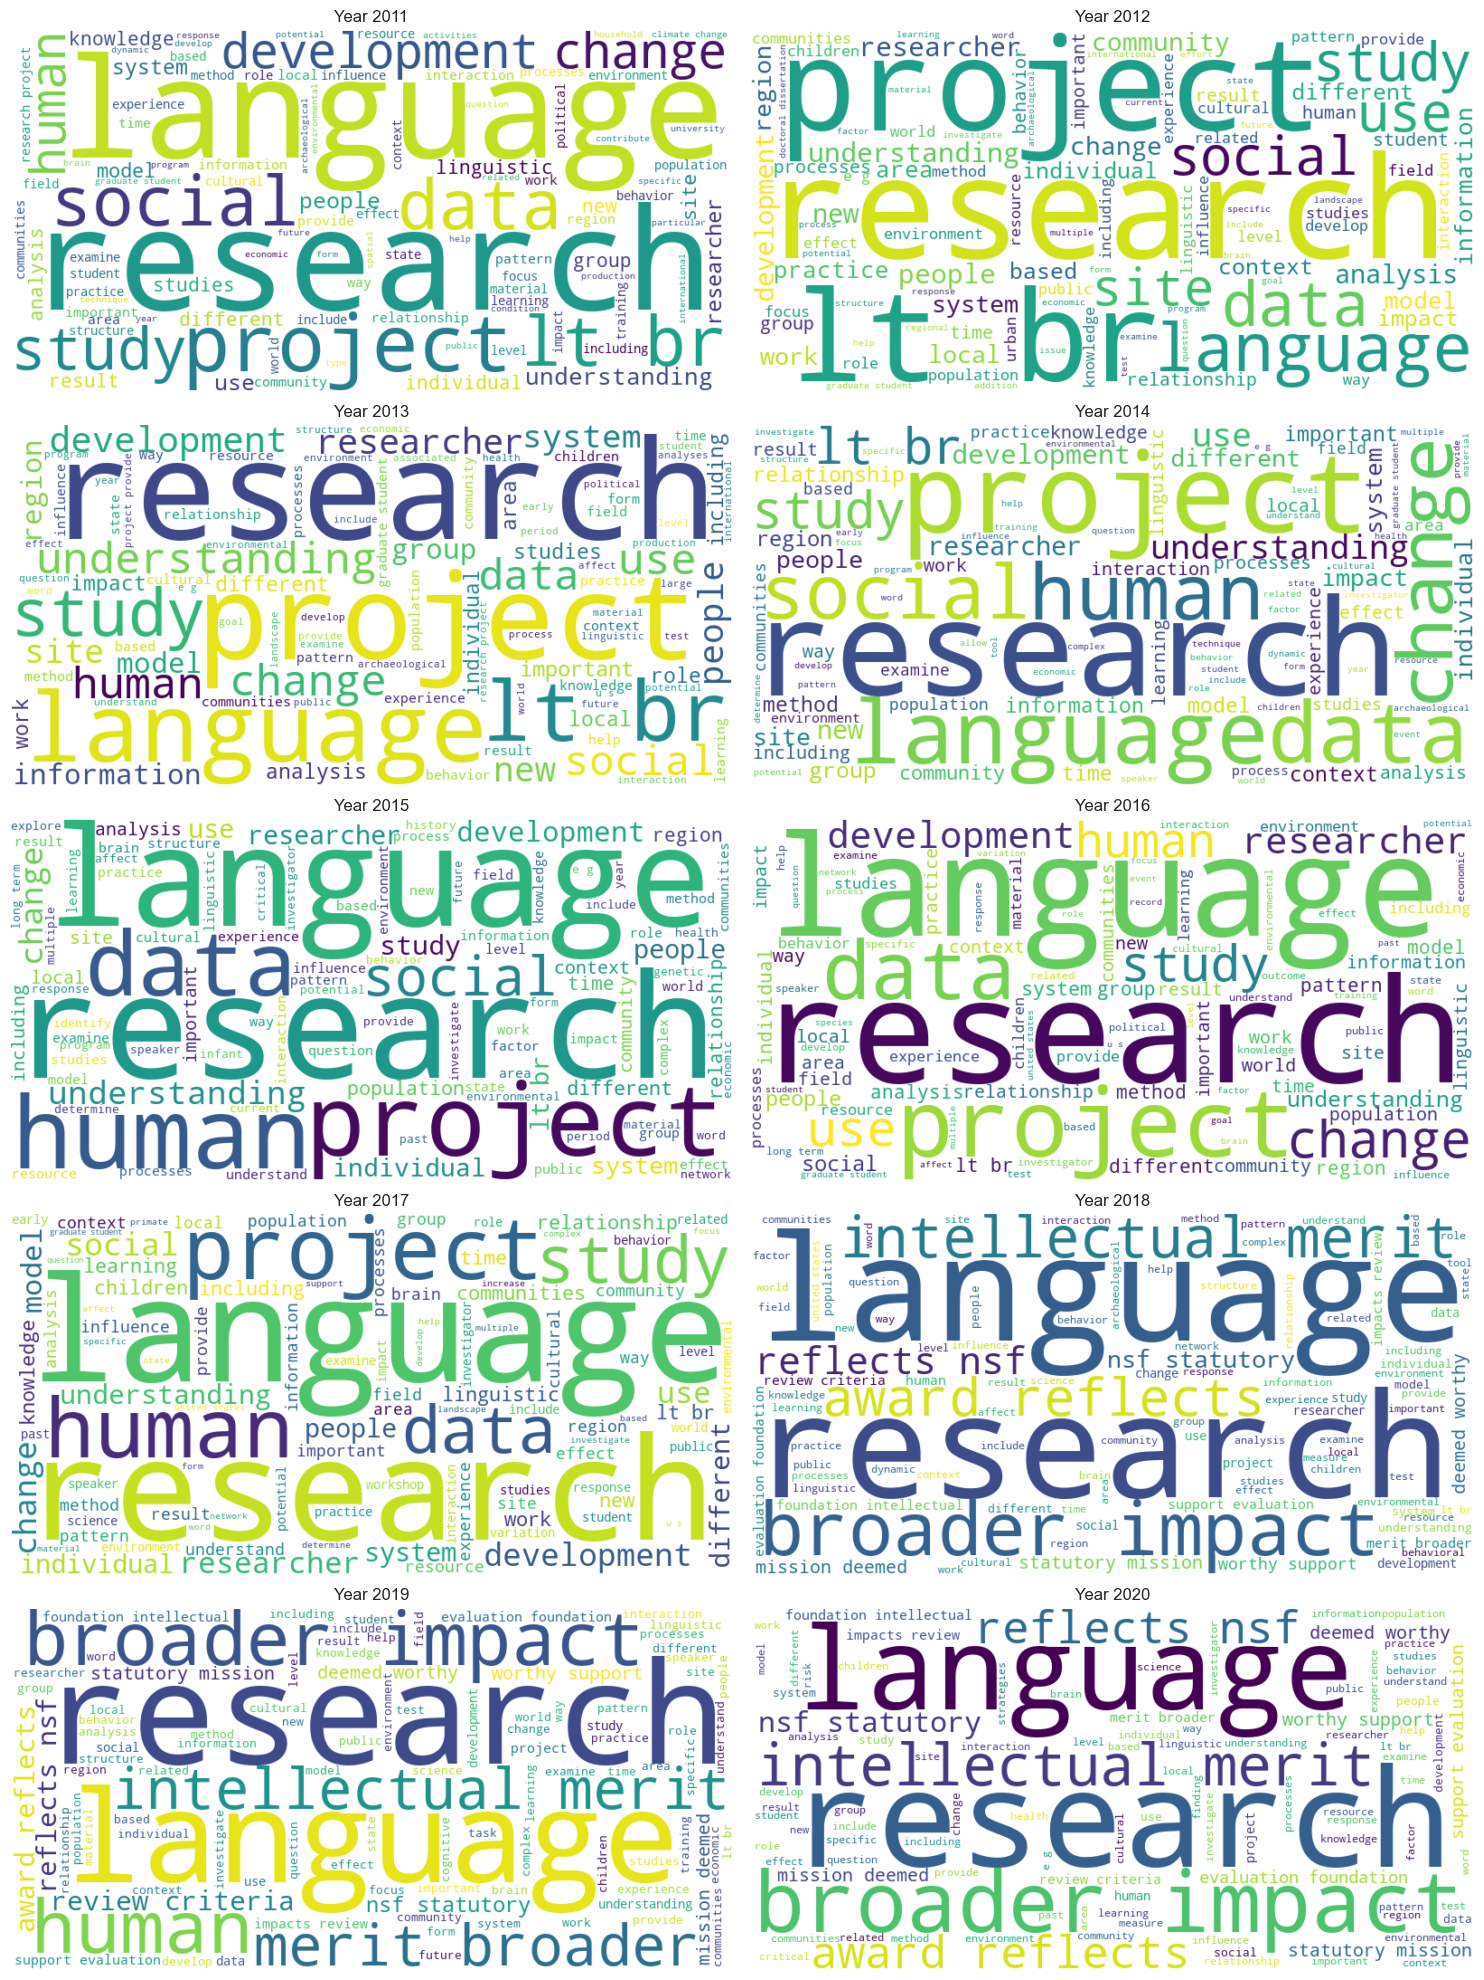

In [20]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2,  figsize=(15, 20))
axes = axes.flatten()

for i, row in funding_info_aggregated_words.iterrows():
    # Generate a word cloud image for each year
    wordcloud = WordCloud(background_color='white', max_words=100, width=800, height=400).generate(row['wordcloud_text_cleaned'])
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Year {row['award_year']}")
    plt.tight_layout()

# Funding vs. Research Impact

In [21]:
# Add a column indicating whether the specific publication is before or after NSF award
# Here, we take publication year which is the same as award year as "before_award"
regression_data["before_after_award"] = np.where(regression_data["year"] <= regression_data["award_year"], "before_award", "after_award")

In [22]:
group_by_citation = regression_data.groupby(by=['before_after_award', 'email'])['citation'].mean().reset_index()

# find thresholds
Q1 = group_by_citation['citation'].quantile(0.25)
Q3 = group_by_citation['citation'].quantile(0.75)
IQR = Q3 - Q1

# remvoe outliers
group_by_citation = group_by_citation.query('(@Q1 - 1.5 * @IQR) <= citation <= (@Q3 + 1.5 * @IQR)')
group_by_citation

before_after_award                           email     citation
0           after_award            00t0holtgrav@bsu.edu   543.250000
1           after_award                 Alvard@tamu.edu   587.428571
3           after_award         Amy.Syvertsen@gmail.com   373.250000
4           after_award        Ariel.Goldberg@tufts.edu    66.250000
5           after_award  Ashley.VanMeter@georgetown.edu   523.000000
...                 ...                             ...          ...
4051       before_award                zhonglin@nyu.edu  1017.800000
4052       before_award             zkrizan@iastate.edu   126.600000
4053       before_award               zoe.wool@rice.edu    22.750000
4054       before_award                    zook@uky.edu   300.500000
4055       before_award                    zulu@msu.edu    44.250000

[3634 rows x 3 columns]

In [23]:
# Calculate median values of average yearly citation
median_yearly_citation = group_by_citation.groupby(by=['before_after_award'])['citation'].median()

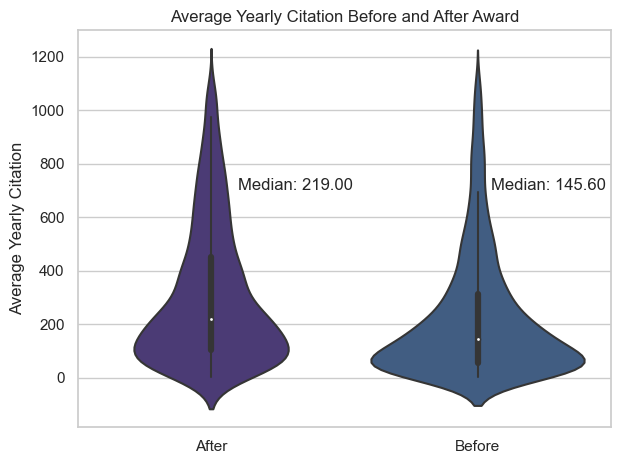

In [24]:
sns.despine(offset=10, trim=True)
sns.violinplot(data=group_by_citation, x='before_after_award', y='citation')
plt.title('Average Yearly Citation Before and After Award')

plt.text(x=0.1, y=700, s=f"Median: {median_yearly_citation[0]:.2f}")
plt.text(x=1.05, y=700, s=f"Median: {median_yearly_citation[1]:.2f}")

plt.xlabel('')
plt.ylabel('Average Yearly Citation')

plt.xticks([0, 1], ['After', 'Before'])
plt.tight_layout()
plt.show()

# Visualization Related to Clustering of Authors Based on Paper Abstract 

In [6]:
# Load `tfidf_matrix_2D`, and `kmeans_tfidf` for later descriptive and visualization
with open('../database/author_clustering/tfidf_matrix_2D.pkl', 'rb') as file:
    tfidf_matrix_2D = pickle.load(file)

with open('../database/author_clustering/tfidf_cluster_mapping.pkl', 'rb') as file:
    tfidf_cluster_mapping = pickle.load(file)

with open('../database/author_clustering/kmeans_tfidf.pkl', 'rb') as file:
    kmeans_tfidf = pickle.load(file)

In [7]:
# cluster assignments
y_kmeans_tfidf = kmeans_tfidf.predict(tfidf_matrix_2D)

# calculate the size for each cluster
sizes = [np.sum(y_kmeans_tfidf == i) for i in range(kmeans_tfidf.n_clusters)]

## Visualize K-Means Clustering

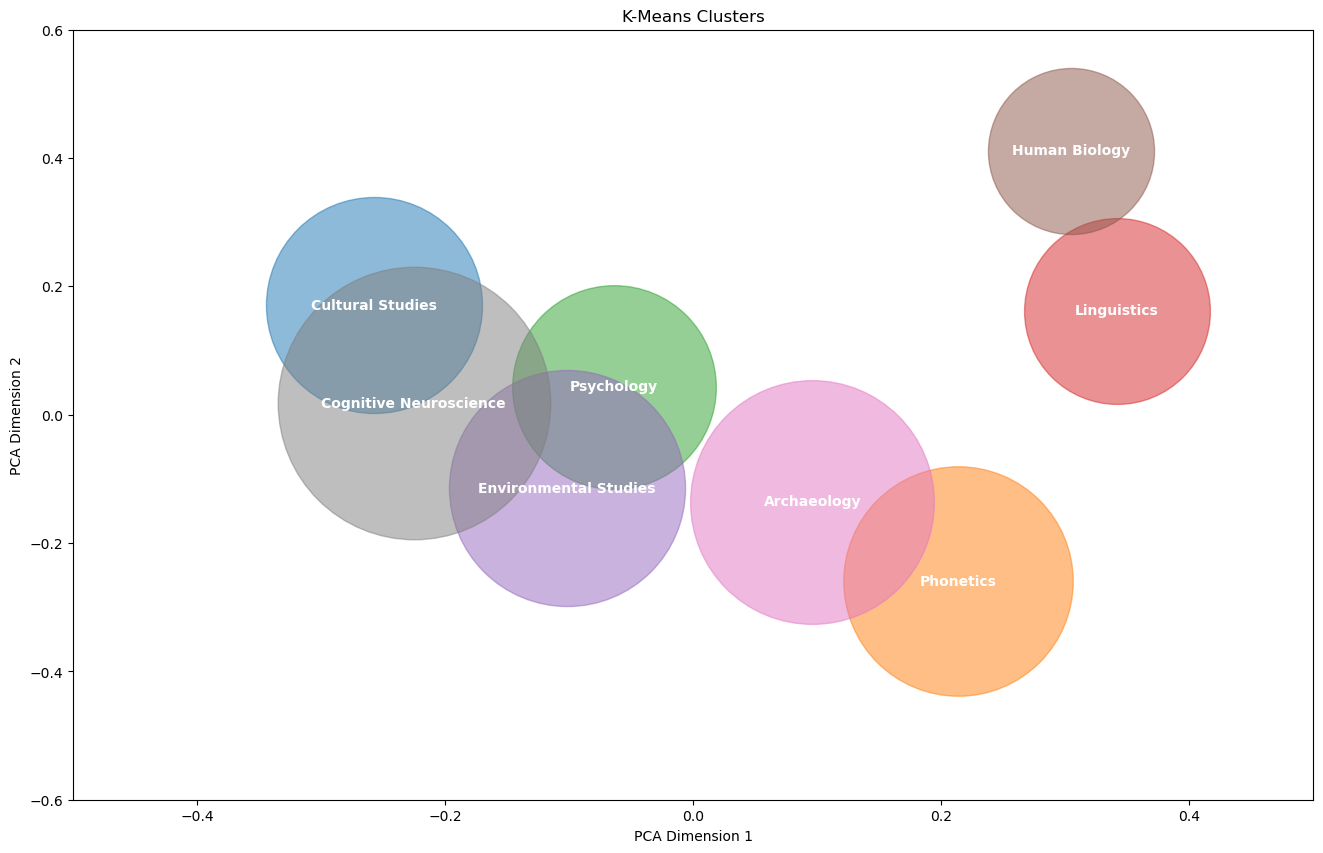

In [11]:
plt.figure(figsize=(16, 10))

# define a colormap
colors = plt.cm.tab10.colors

# plot each cluster with a different color and size
for i in range(kmeans_tfidf.n_clusters):
    centroid = kmeans_tfidf.cluster_centers_[i]
    size = sizes[i] * 100
    plt.scatter(centroid[0], centroid[1], s=size, label=f'Cluster {i}', alpha=0.5, color=colors[i % len(colors)])
    plt.text(centroid[0], centroid[1], tfidf_cluster_mapping[i], ha='center', va='center', color='white', fontsize=10, weight='bold')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.6, 0.6)

plt.title('K-Means Clusters')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

## Word Cloud of Each Cluster

In [12]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# generate a sparse TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_df['normalized_abstract'])

# convert the sparse TF-IDF matrix to a dense matrix
tfidf_matrix = tfidf_matrix.toarray()

In [13]:
# function to find the most distinctive words in each cluster
def find_distinctive_words_by_cluster(clusters, n=20):
    aggregate_tfidf_vectors_by_cluster = {}
    
    for i, cluster in enumerate(clusters):
        if cluster not in aggregate_tfidf_vectors_by_cluster:
            aggregate_tfidf_vectors_by_cluster[cluster] = tfidf_matrix[i]
        else:
            aggregate_tfidf_vectors_by_cluster[cluster] += tfidf_matrix[i]

    distinctive_words_by_cluster = {}
    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
    
    for cluster, agg_tfidf in aggregate_tfidf_vectors_by_cluster.items():
        sorted_indices = np.argsort(agg_tfidf).flatten()[::-1]
        distinctive_words_by_cluster[cluster] = feature_names[sorted_indices][:n]
    
    return distinctive_words_by_cluster

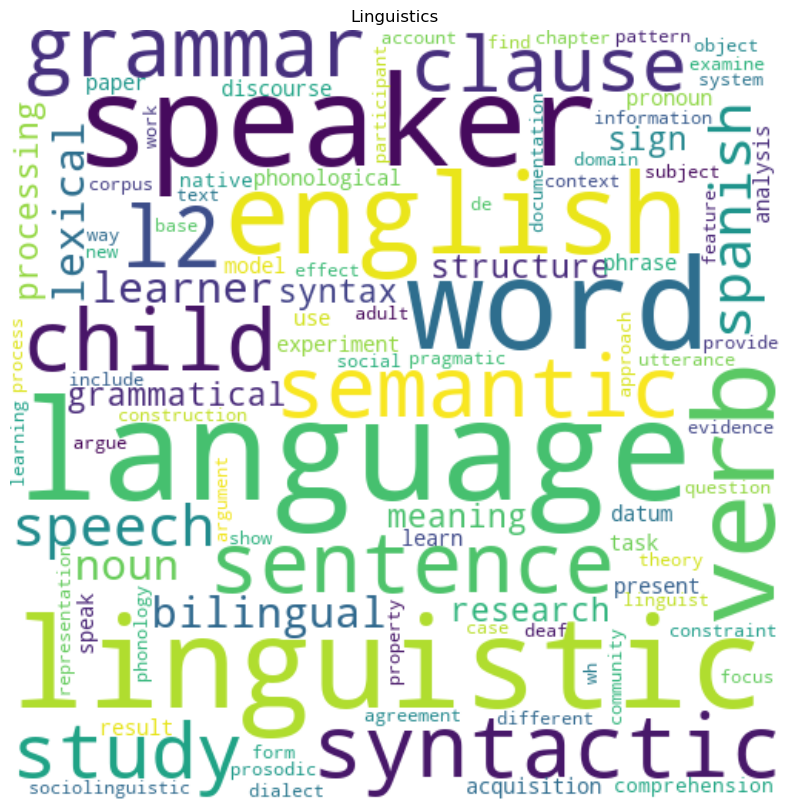

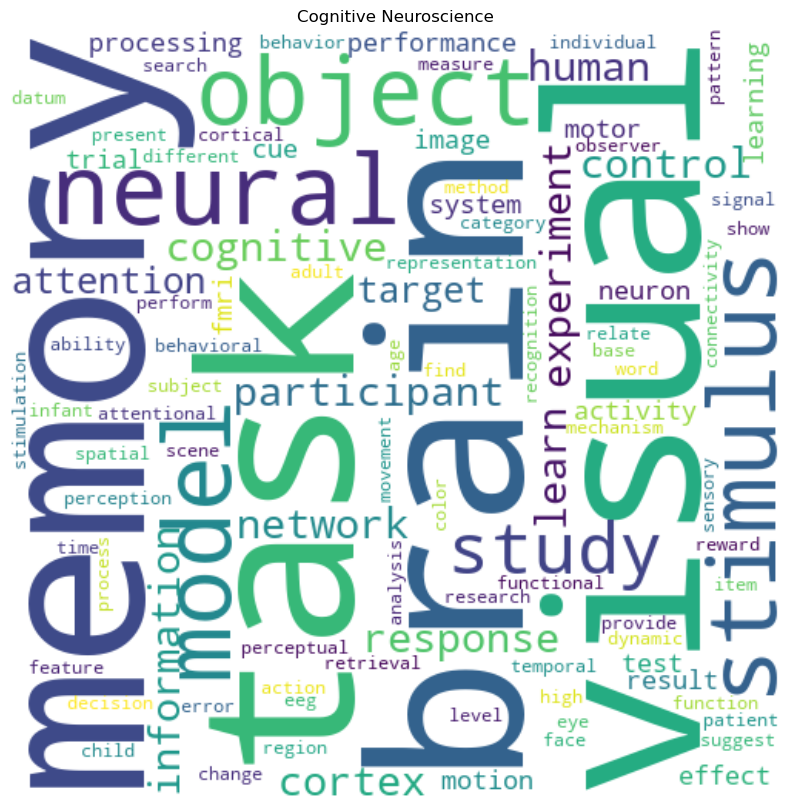

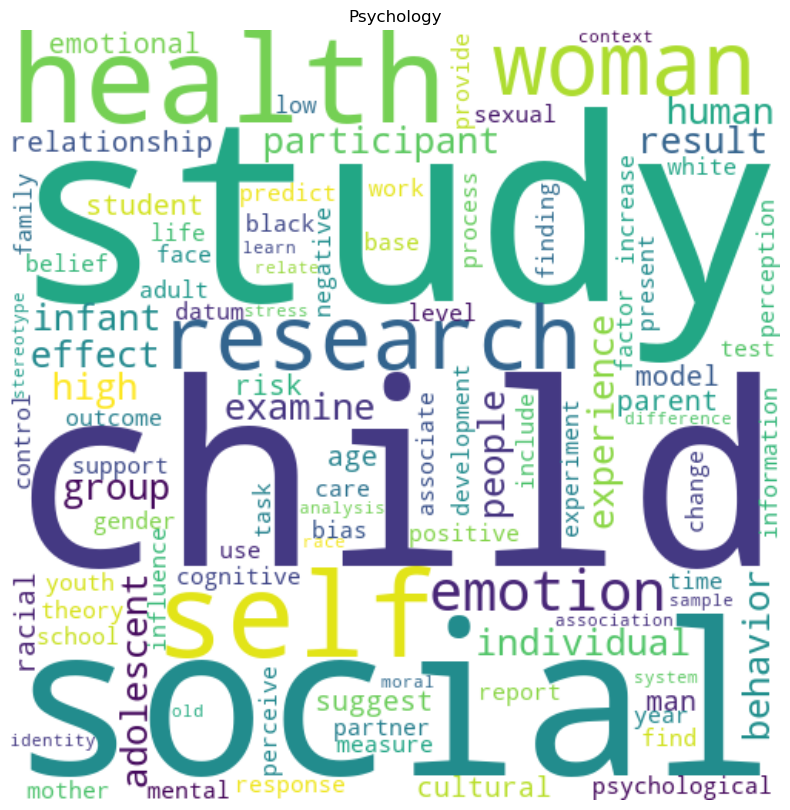

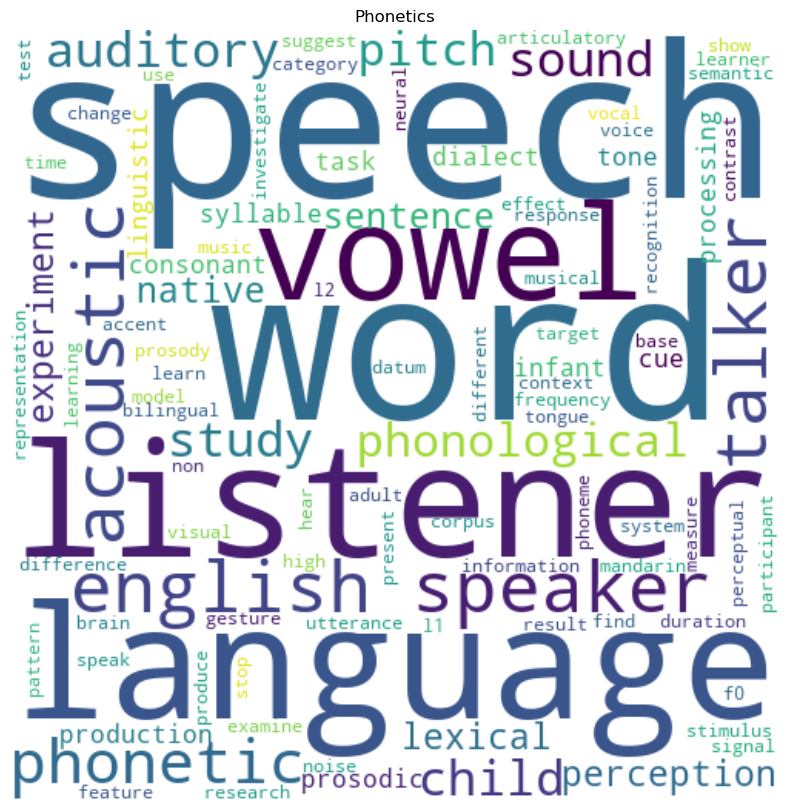

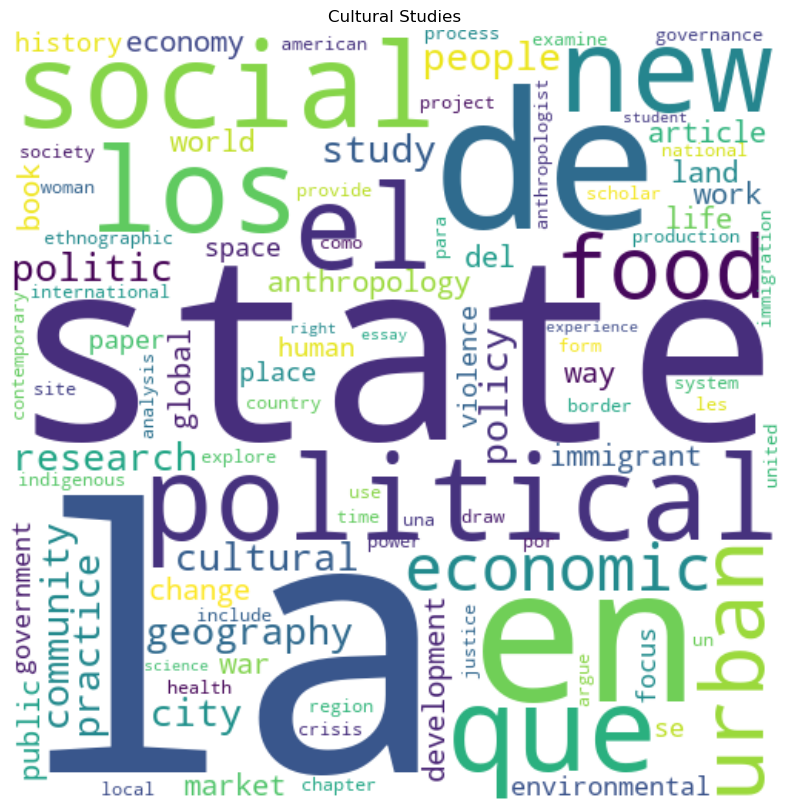

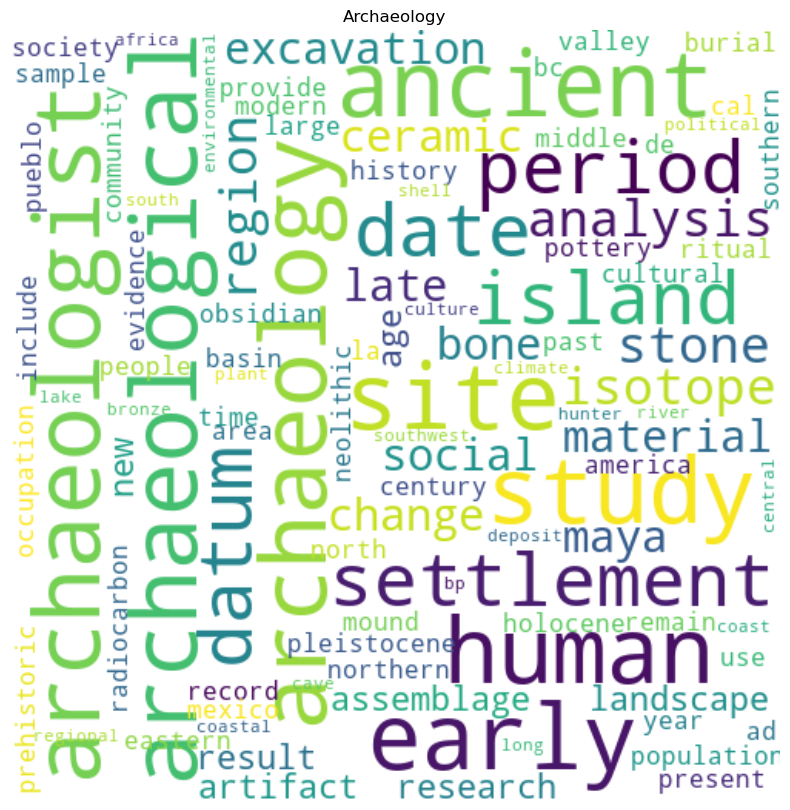

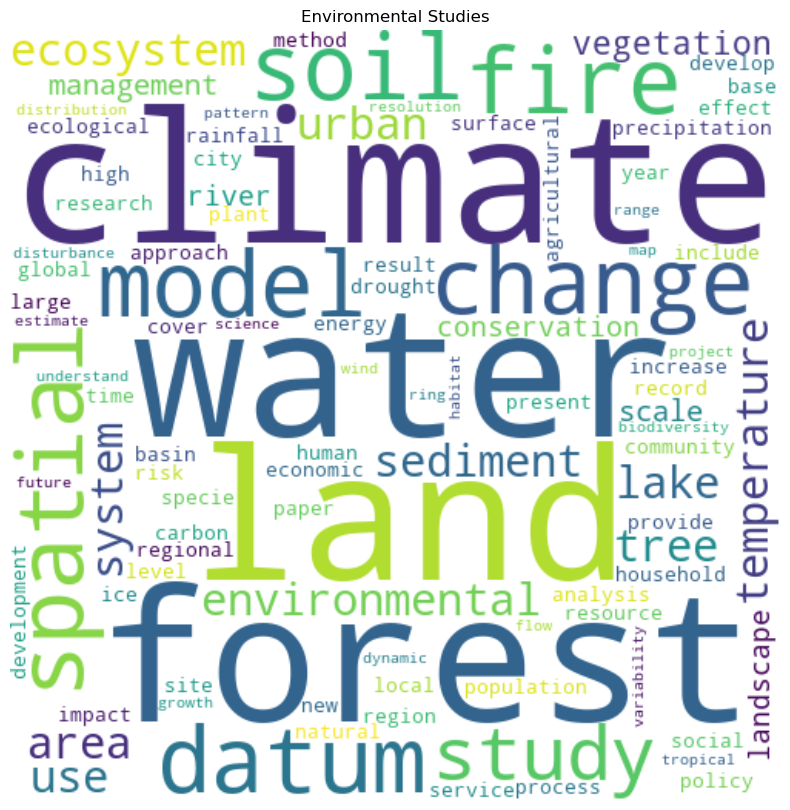

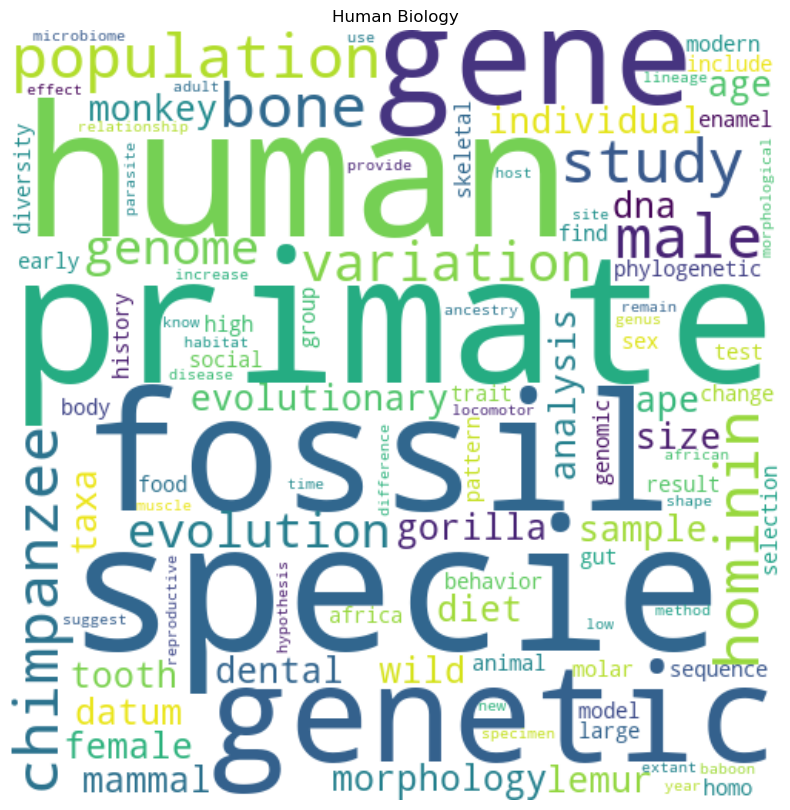

In [12]:
# find 100 most distinctive words in each cluster
distinctive_words_by_cluster = find_distinctive_words_by_cluster(cluster_df['tfidf_cluster'], n=100)

# generate a wordcloud for each cluster
for cluster, words in distinctive_words_by_cluster.items():
    wordcloud = WordCloud(width = 1000, height = 1000, 
                          background_color ='white',
                          mode='RGBA', scale=.5,  
                          min_font_size = 10).generate(' '.join(words))
        
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
        
    plt.title(f"{cluster}")
    plt.show()

## Bar Graph of Top 10 Most Frequent Words in Each Cluster

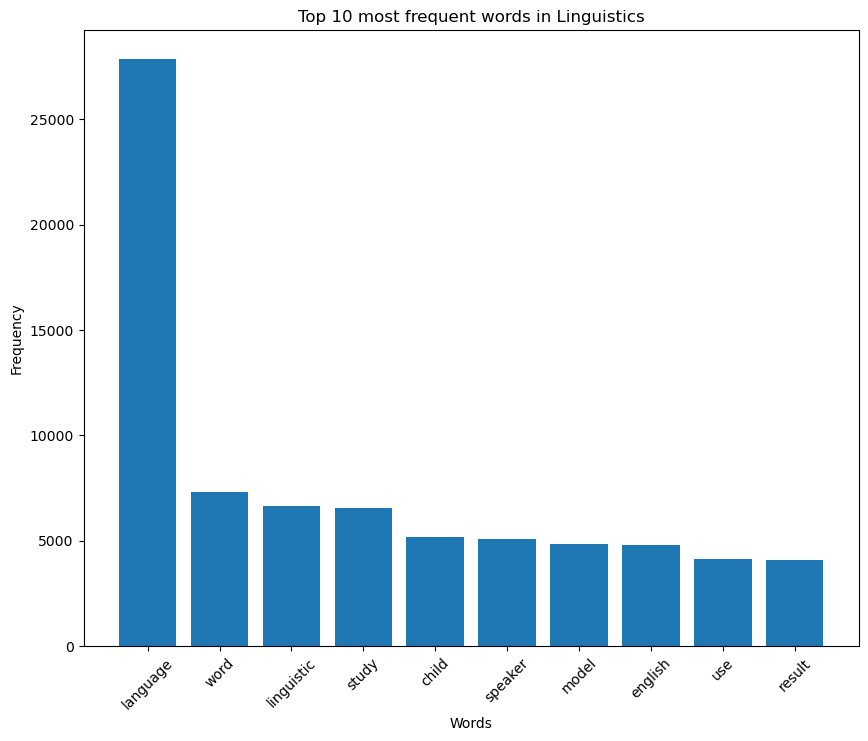

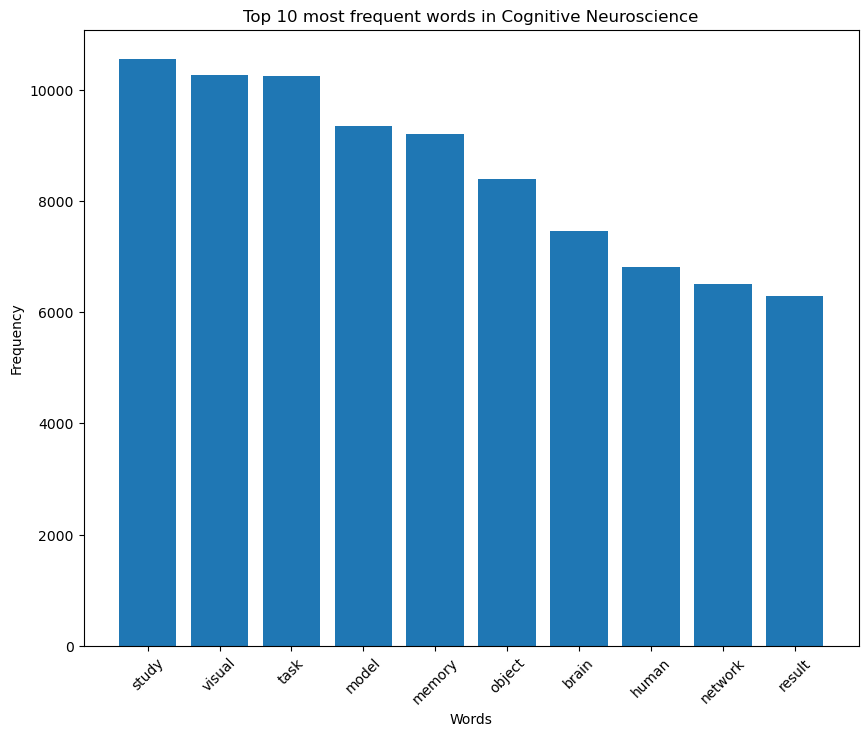

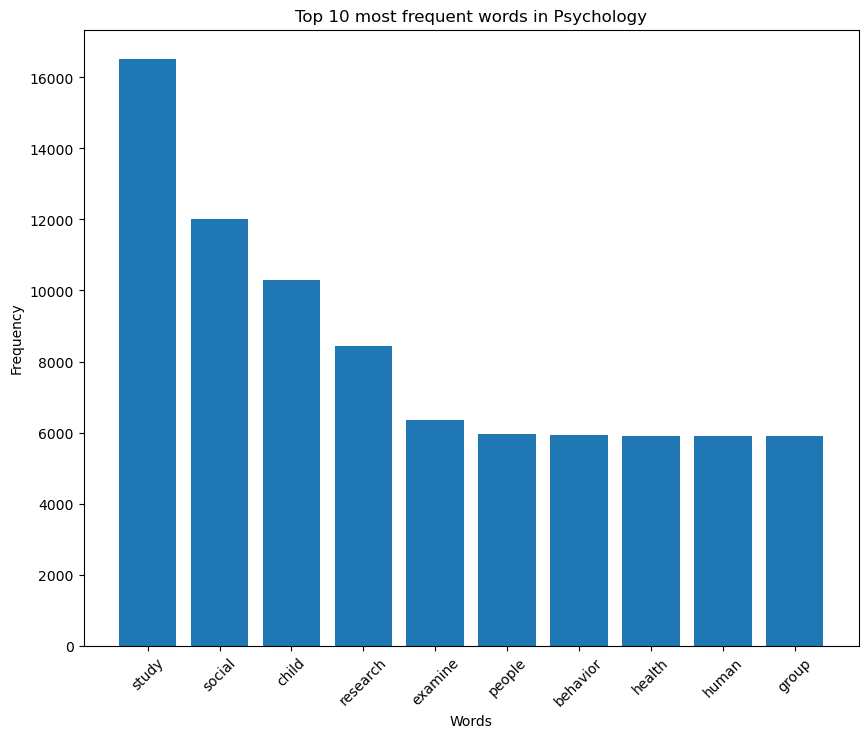

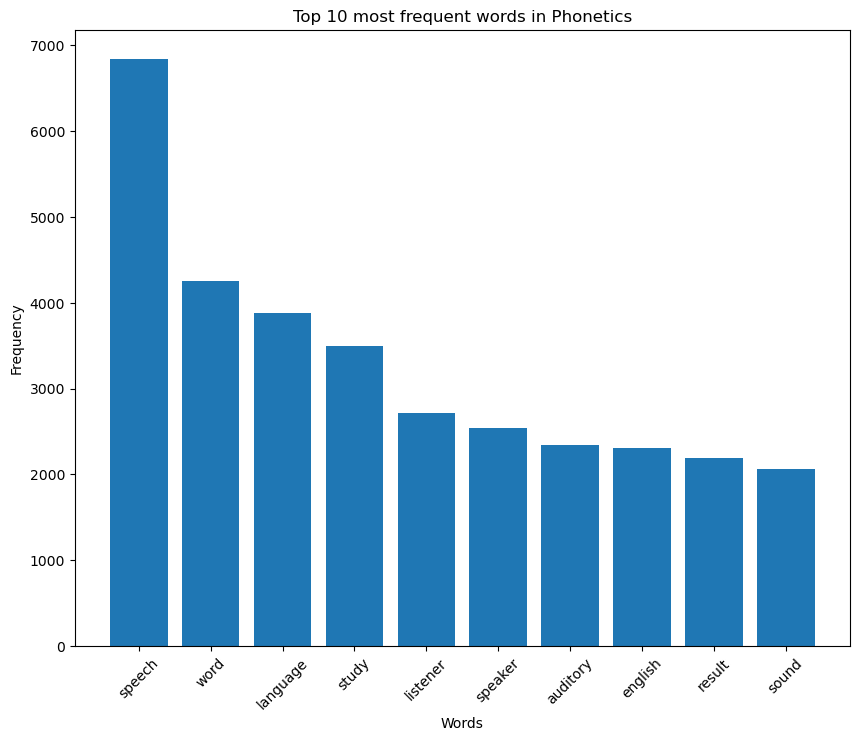

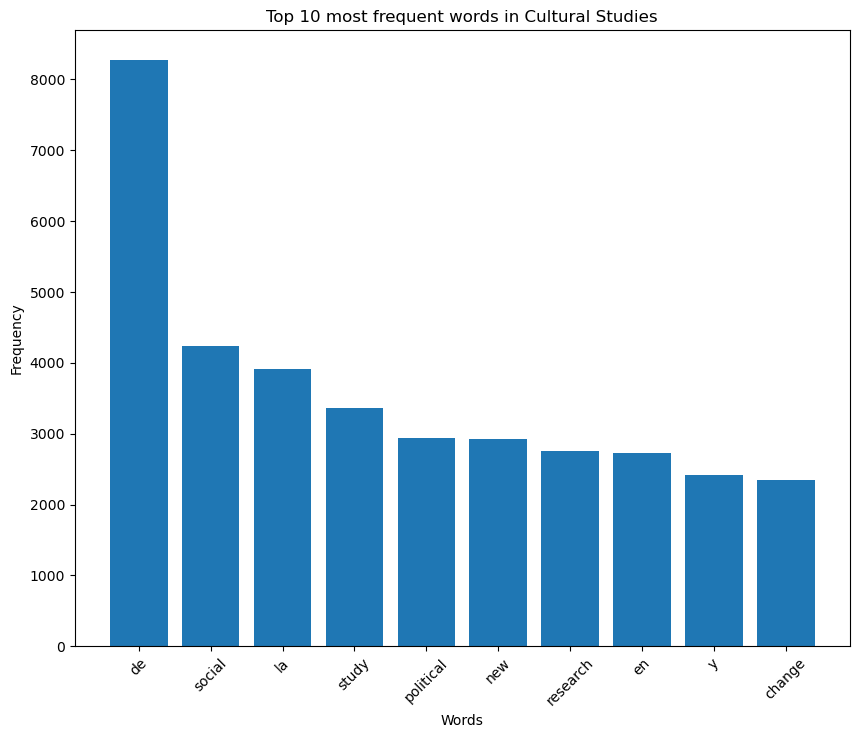

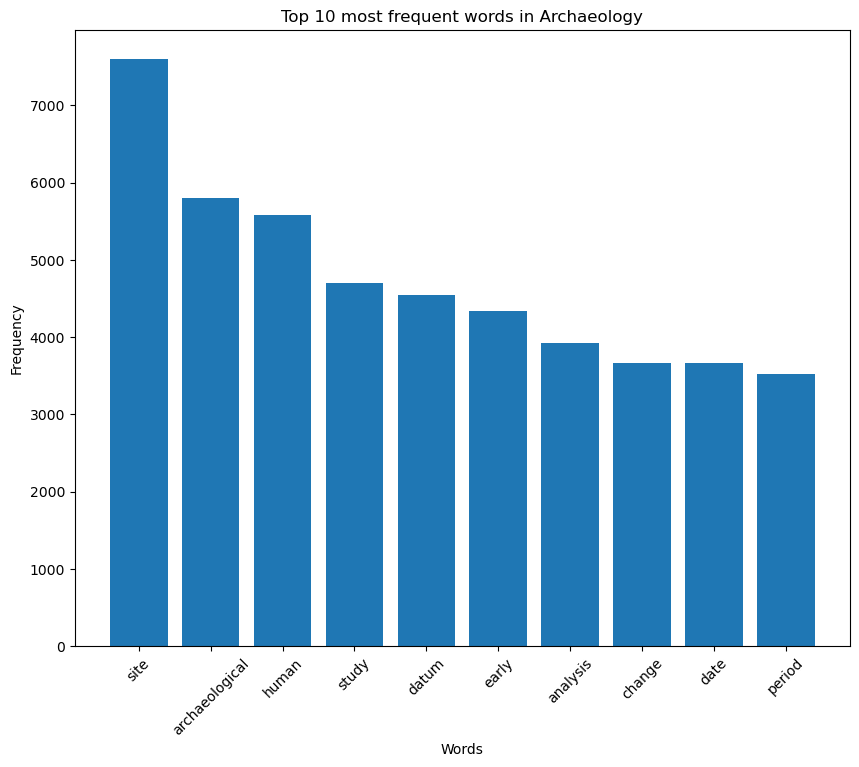

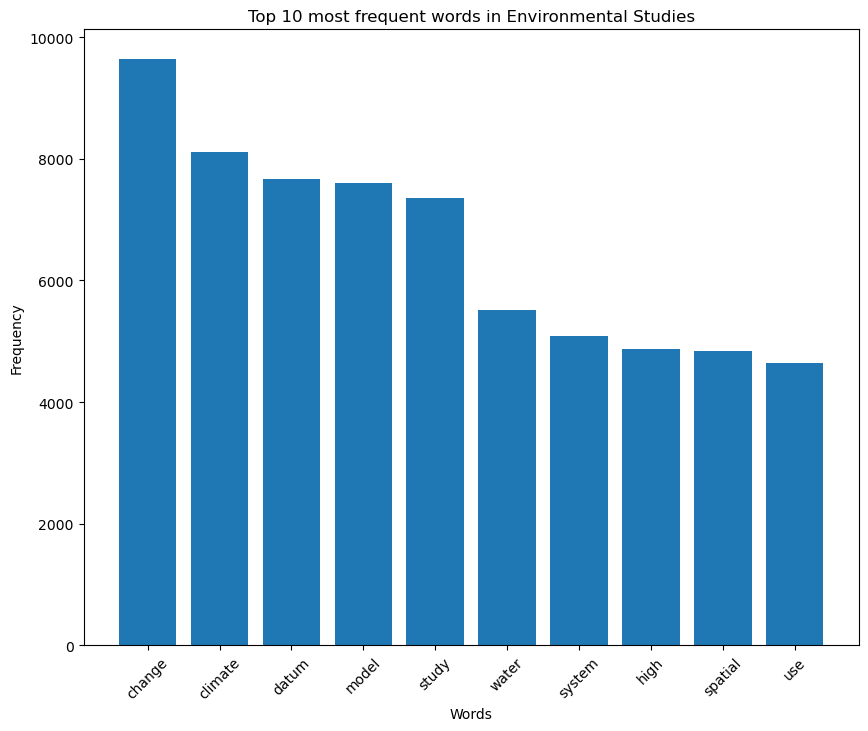

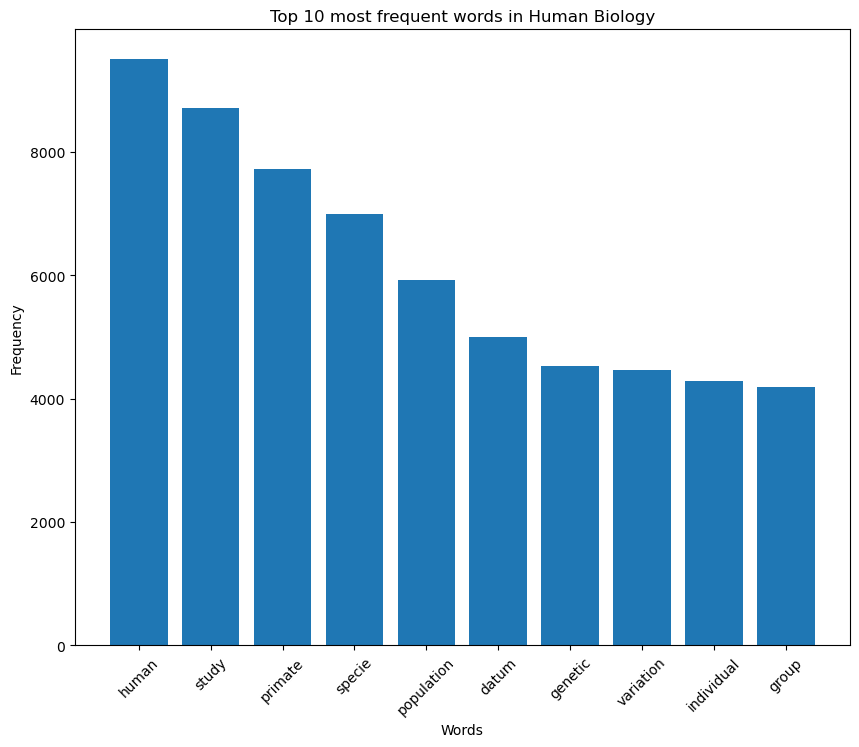

In [14]:
# find all labels
labels = cluster_df['tfidf_cluster'].unique()

for label in labels:
    subset = cluster_df[cluster_df['tfidf_cluster'] == label]
    text = subset['normalized_abstract'].str.split().sum()
    
    # count the frequency of each word in the list
    word_counts = Counter(text)
    
    # get the top 10 most frequent words and their counts
    top_words = word_counts.most_common(10)
    words, frequencies = zip(*top_words)
    
    plt.figure(figsize=(10, 8))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 most frequent words in {label}')
    plt.xticks(rotation=45)
    plt.show()

## Bar Graph of Top 10 Journals of Each Cluster

In [15]:
# create a dataframe for 'journal' visualization 
journal_df = combined_info.groupby('email')['journal'].apply(list).reset_index()
journal_df = pd.merge(cluster_df, journal_df, on='email', how='left')
journal_df

email  \
0                 00t0holtgrav@bsu.edu   
1           a.satpute@northeastern.edu   
2                     aabrewer@uci.edu   
3                         aag6@psu.edu   
4                 aam72@georgetown.edu   
...                                ...   
2029               zkrizan@iastate.edu   
2030                 zoe.wool@rice.edu   
2031                      zook@uky.edu   
2032                      zulu@msu.edu   
2033  zygmunt.frajzyngier@colorado.edu   

                                    normalized_abstract  \
0     interdisciplinary synthesis social psychologic...   
1     emotion assume manifest subcortical limbic bra...   
2     functional organization human auditory cortex ...   
3     decade introduction concept emotional labor re...   
4     autism spectrum disorder asds characterize soc...   
...                                                 ...   
2029  narcissism spectrum model synthesize extensive...   
2030  war zoë h. wool explore american soldier sever...   
2031  paper outline way information technologie hait...   
2032  urban household sub saharan africa use charcoa...   
2033  hdi hitherto undescribe language speak norther...   

               tfidf_cluster  \
0                Linguistics   
1     Cognitive Neuroscience   
2     Cognitive Neuroscience   
3                 Psychology   
4                 Psychology   
...                      ...   
2029              Psychology   
2030        Cultural Studies   
2031        Cultural Studies   
2032   Environmental Studies   
2033             Linguistics   

                                                journal  
0     [journal not found, Journal of gambling studie...  
1     [journal not found, journal not found, journal...  
2     [journal not found, Frontiers in psychology, A...  
3     [journal not found, Journal of occupational he...  
4     [Development and Psychopathology, JAMA Psychia...  
...                                                 ...  
2029  [journal not found, Perspectives on Psychologi...  
2030  [journal not found, Critical Military Studies,...  
2031  [World Medical & Health Policy, Cambridge jour...  
2032  [journal not found, journal not found, BMC inf...  
2033  [journal not found, journal not found, journal...  

[2034 rows x 4 columns]

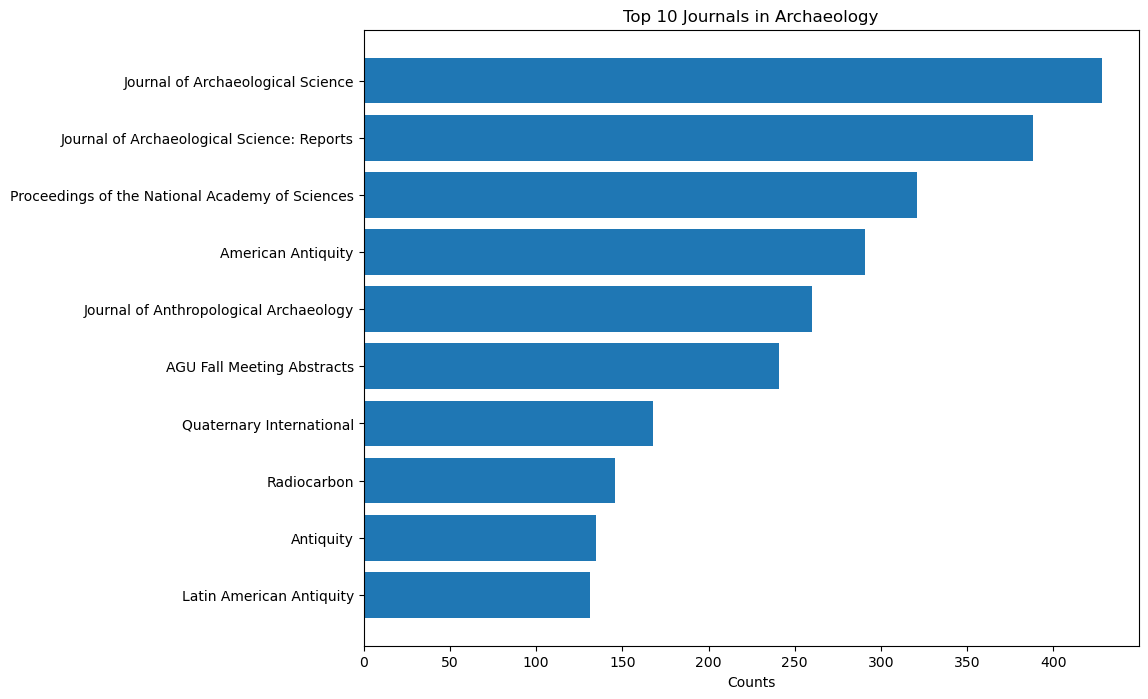

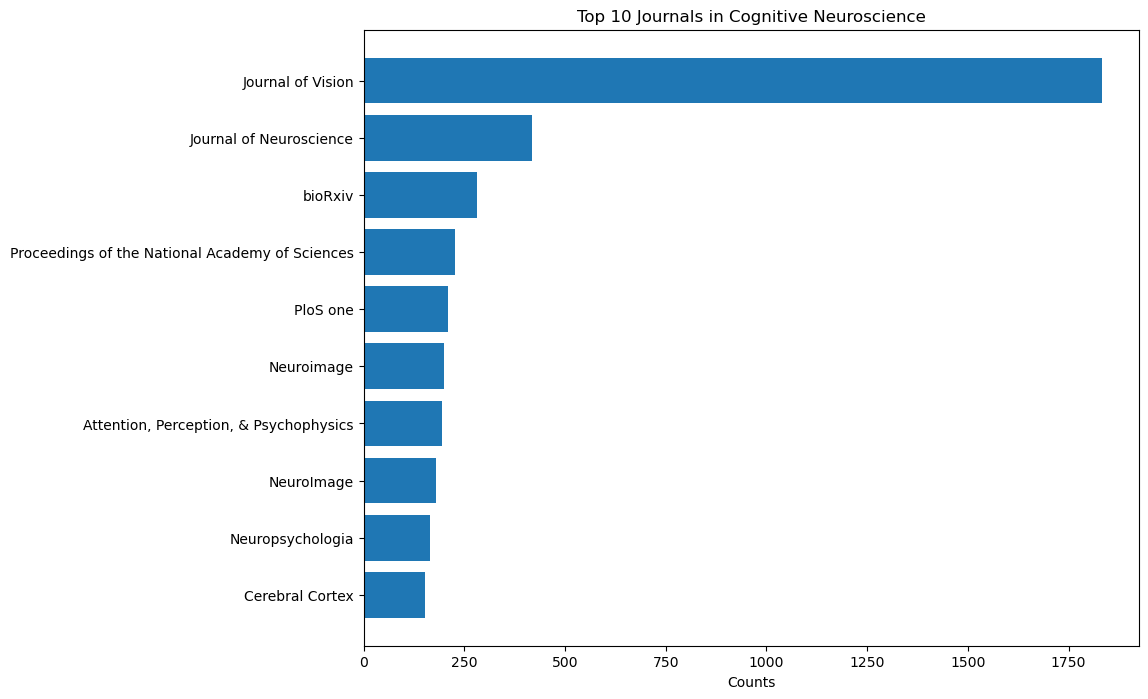

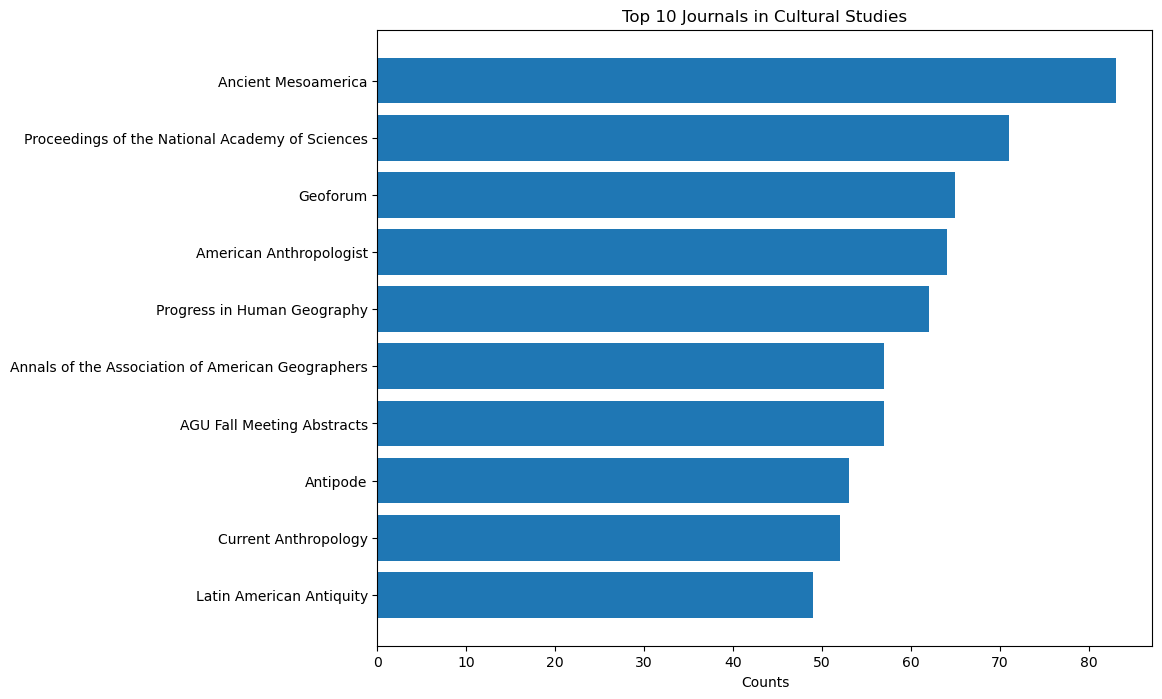

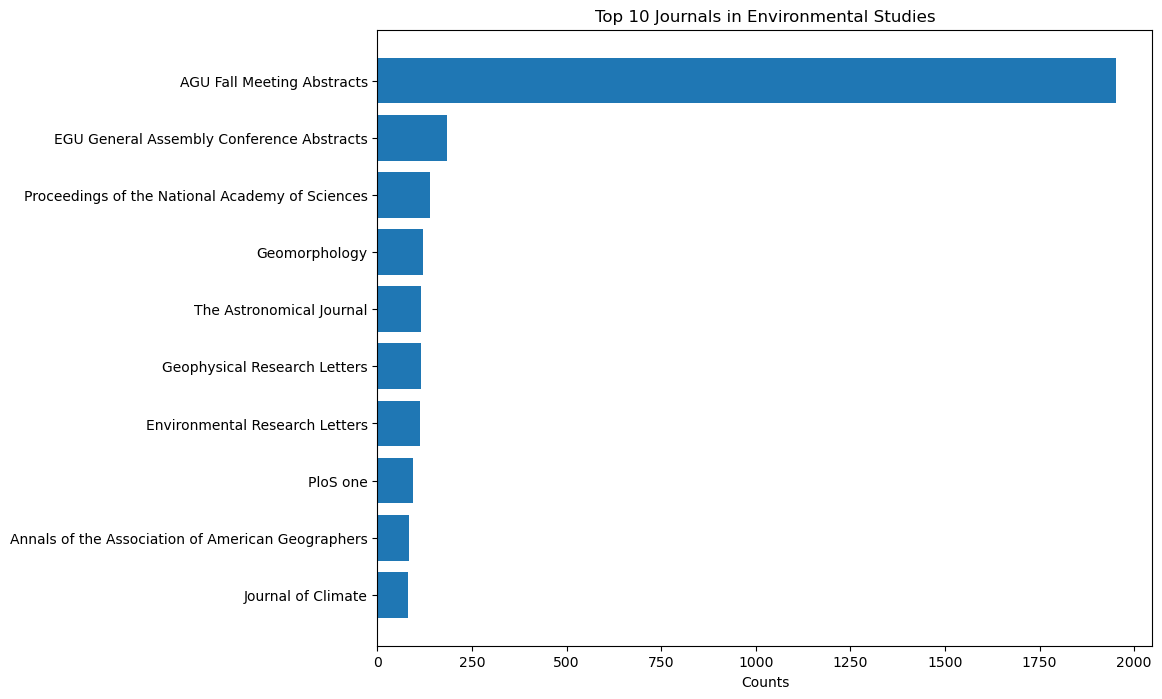

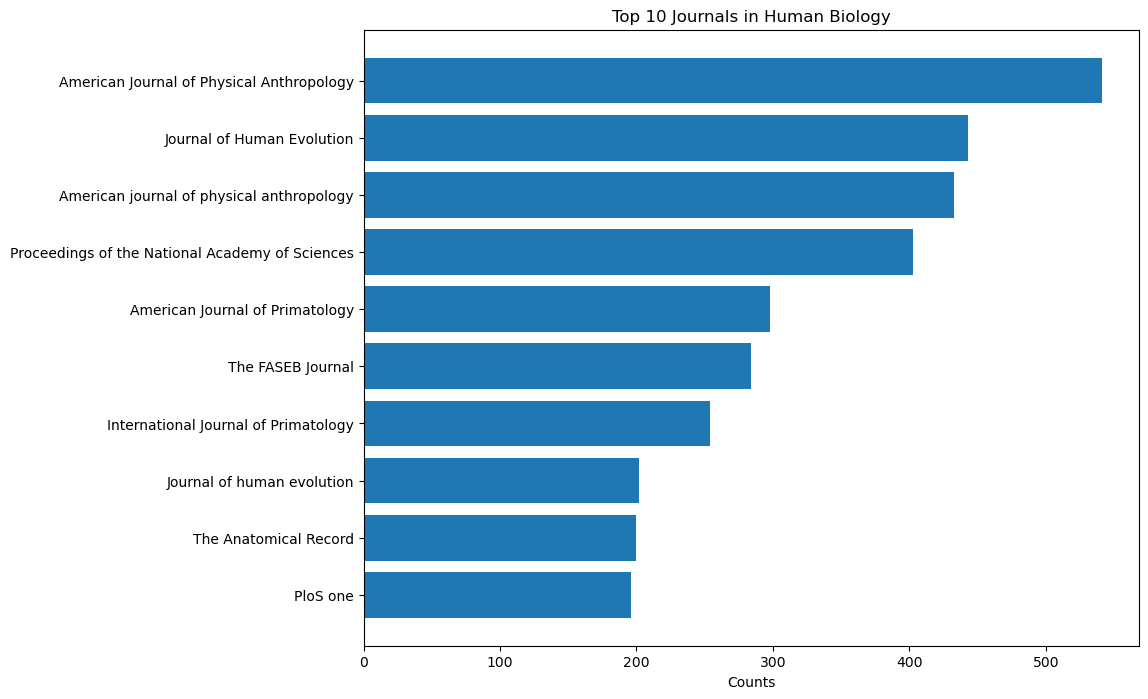

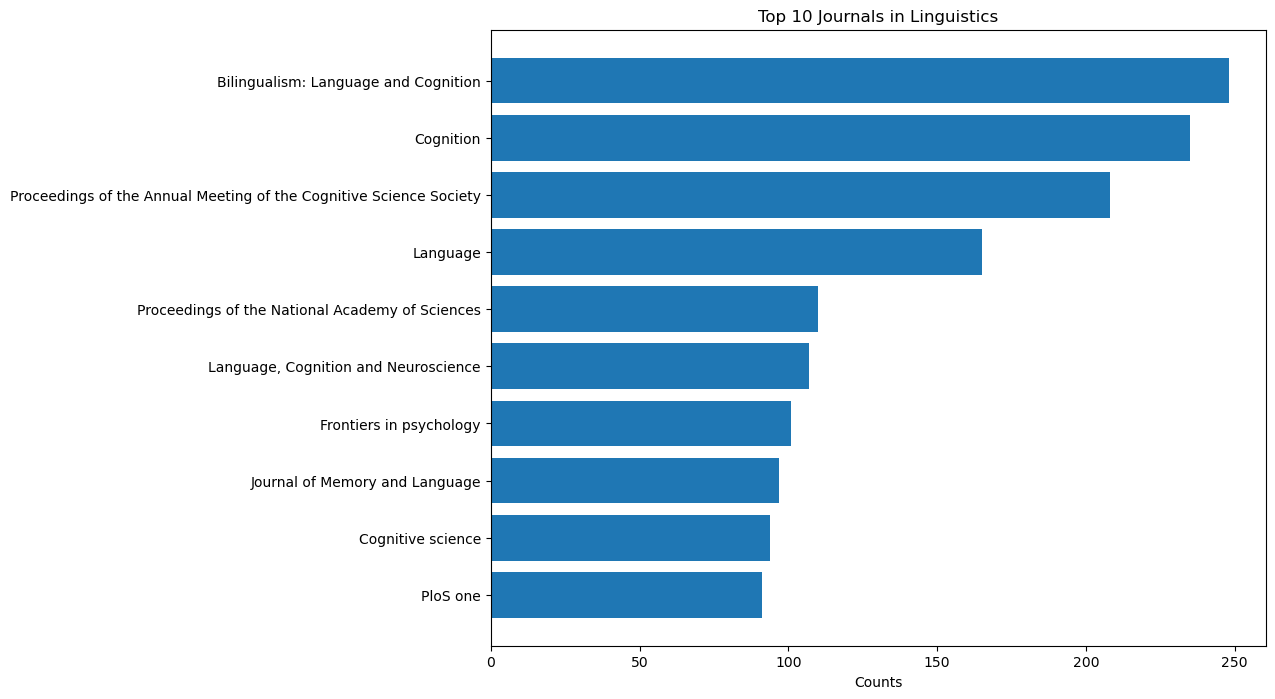

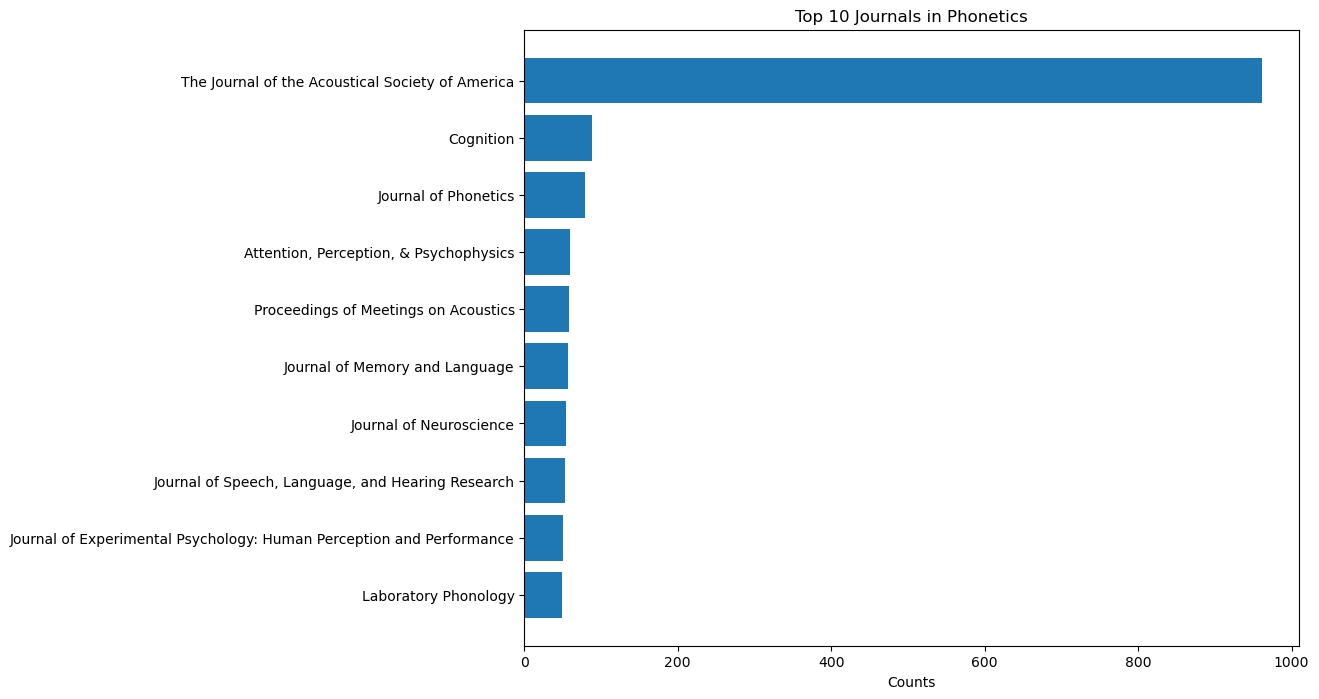

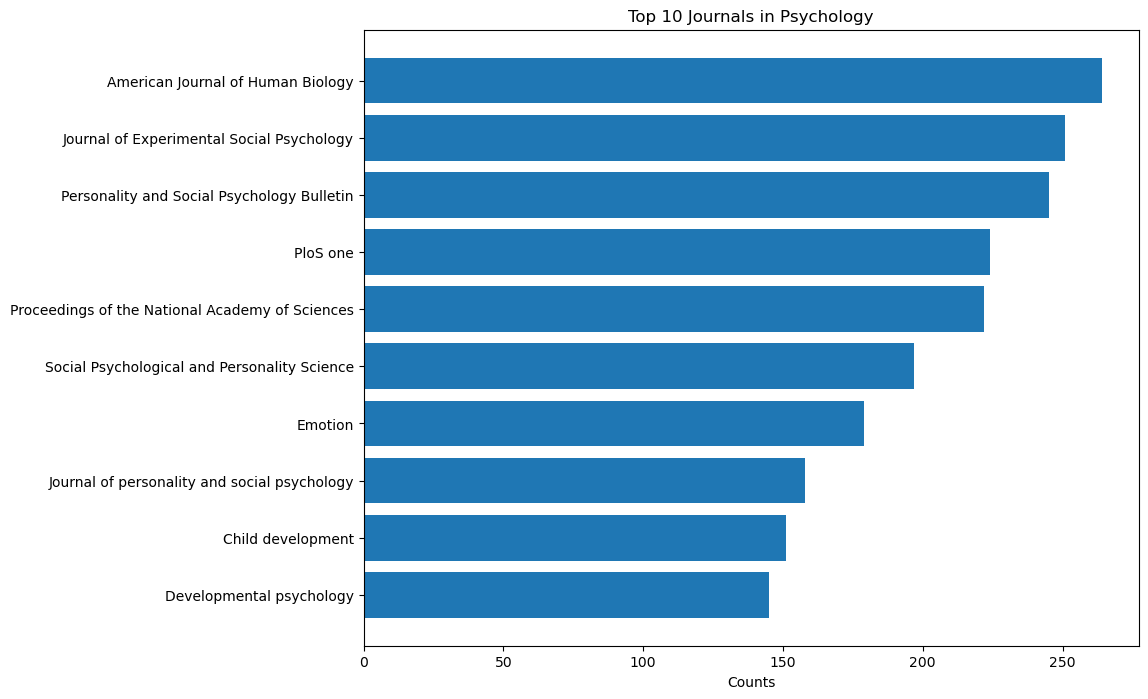

In [16]:
# flatten lists in 'journal' column
expanded_rows = journal_df.explode('journal')

# remove 'journal not found' entries
cleaned_rows = expanded_rows[expanded_rows['journal'] != 'journal not found']

# count the occurrences of each journal within each cluster
journal_counts = cleaned_rows.groupby(['tfidf_cluster', 'journal']).size().reset_index(name='counts')

# identify the top 10 journals for each cluster
top_journals = journal_counts.groupby('tfidf_cluster').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)

# plot the bar graphs for each cluster
clusters = top_journals['tfidf_cluster'].unique()
for cluster in clusters:
    plt.figure(figsize=(10, 8))
    cluster_data = top_journals[top_journals['tfidf_cluster'] == cluster]
    cluster_data = cluster_data.sort_values('counts', ascending=True)
    plt.barh(cluster_data['journal'], cluster_data['counts'])
    plt.xlabel('Counts')
    plt.title(f'Top 10 Journals in {cluster}')
    plt.show()

In [22]:
# create a dataframe for 'award_amount' visualization
award_df = combined_info.drop_duplicates(subset=['email'], keep='first')
award_df = pd.merge(cluster_df, award_df, on='email', how='left')
award_df[['email', 'tfidf_cluster', 'award_amount']]

email          tfidf_cluster  award_amount
0                 00t0holtgrav@bsu.edu            Linguistics        165000
1           a.satpute@northeastern.edu           Neuroscience        799998
2                     aabrewer@uci.edu           Neuroscience        475958
3                         aag6@psu.edu             Psychology         41076
4                 aam72@georgetown.edu             Psychology        390273
...                                ...                    ...           ...
2029               zkrizan@iastate.edu             Psychology        473389
2030                 zoe.wool@rice.edu  Environmental Studies        499992
2031                      zook@uky.edu  Environmental Studies         11513
2032                      zulu@msu.edu  Environmental Studies         15989
2033  zygmunt.frajzyngier@colorado.edu            Linguistics         11951

[2034 rows x 3 columns]

In [13]:
# create a dataframe for 'award_amount' visualization
award_df = combined_info.drop_duplicates(subset=['email'], keep='first')
award_df = pd.merge(cluster_df, award_df, on='email', how='left')
award_df[['email', 'tfidf_cluster', 'award_amount']]

email           tfidf_cluster  award_amount
0                 00t0holtgrav@bsu.edu             Linguistics        165000
1           a.satpute@northeastern.edu  Cognitive Neuroscience        799998
2                     aabrewer@uci.edu  Cognitive Neuroscience        475958
3                         aag6@psu.edu              Psychology         41076
4                 aam72@georgetown.edu              Psychology        390273
...                                ...                     ...           ...
2029               zkrizan@iastate.edu              Psychology        473389
2030                 zoe.wool@rice.edu        Cultural Studies        499992
2031                      zook@uky.edu        Cultural Studies         11513
2032                      zulu@msu.edu   Environmental Studies         15989
2033  zygmunt.frajzyngier@colorado.edu             Linguistics         11951

[2034 rows x 3 columns]

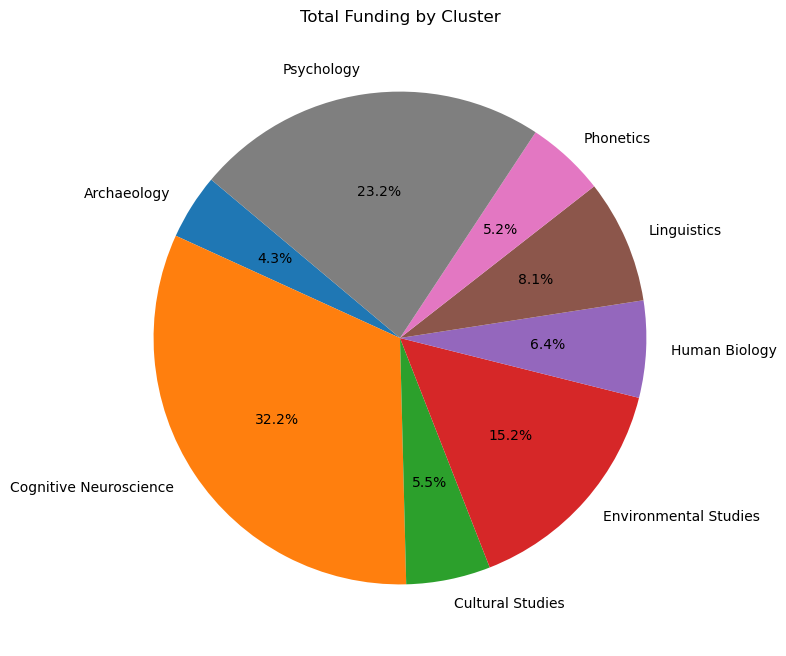

In [14]:
# group 'award_amount' by cluster
award_sums = award_df.groupby('tfidf_cluster')['award_amount'].sum()

# plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(award_sums, labels=award_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Funding by Cluster')
plt.show()

In [15]:
award_averages = award_df.groupby('tfidf_cluster')['award_amount'].mean() / 1000

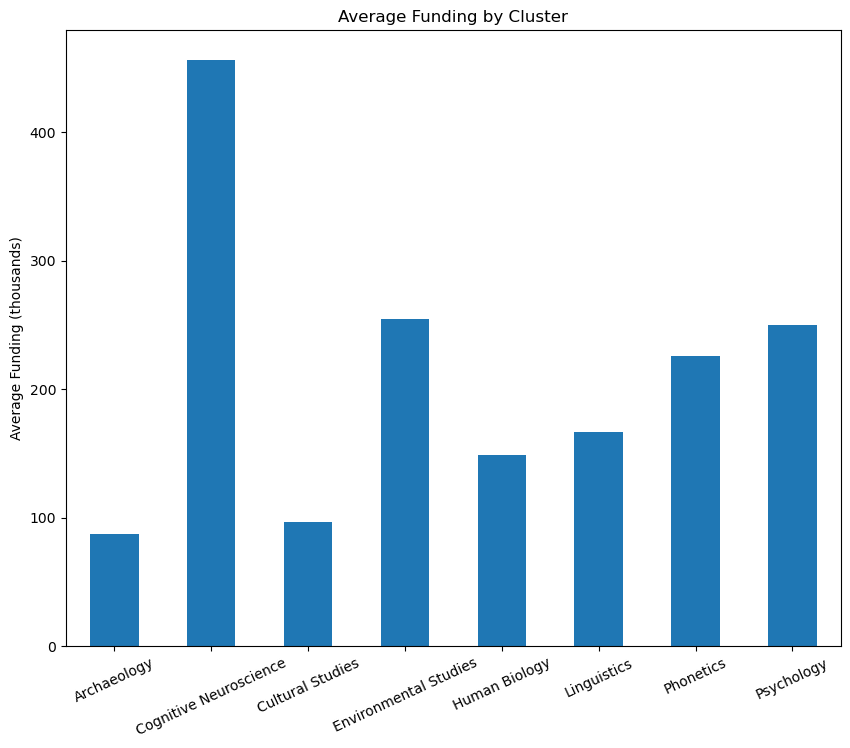

In [16]:
plt.figure(figsize=(10, 8))
award_averages.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Average Funding (thousands)')
plt.title('Average Funding by Cluster')
plt.xticks(rotation=25)
plt.show()